In [61]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac_s

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [150]:
mnist = fetch_mldata("MNIST-original")
data = mnist.data / 255.0
target = mnist.target.astype("int0")

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=1/7, random_state=666)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [192]:
result = np.empty(test_target.__len__()).astype(int)

data_from_file = open("save_file_5.txt").read()

for enum, ch in enumerate(data_from_file):
    result[enum] = int(ch)
    
result

array([5, 2, 3, ..., 0, 2, 9])

In [193]:
ac_s(test_target, result)

0.9815

In [194]:
# transform for rotate
from skimage.transform import rotate
test_data = test_data.reshape(10000, 28, 28)
data_rot = np.empty(test_data.shape)
for enum in range(test_data.__len__()):
    data_rot[enum] = rotate(test_data[enum], -35, preserve_range=True)

In [195]:
# transform for gaussian
from skimage.filters import gaussian
from math import sqrt
test_data = data_rot
data_rot = np.empty(test_data.shape)
for enum in range(test_data.__len__()):
    data_rot[enum] = gaussian(test_data[enum], sqrt(0.8), preserve_range=True)

In [196]:
diff_positions = np.argwhere(test_target != result)
same_positions = np.argwhere(test_target == result)

In [197]:
# let's count size of classes
unique, counts = np.unique(test_target, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 943, 1153,  998,  990,  959,  898, 1017, 1049,  986, 1007]))

In [198]:
unique, right_answers_count = np.unique(result[same_positions], return_counts = True)
right_answers_count

array([ 941, 1144,  984,  959,  938,  865, 1009, 1028,  957,  990])

In [199]:
wrong_answers_each_class = counts - right_answers_count
wrong_answers_each_class

array([ 2,  9, 14, 31, 21, 33,  8, 21, 29, 17])

In [200]:
conf_matr = confusion_matrix(test_target, result)
conf_matr

array([[ 941,    0,    1,    0,    0,    0,    0,    0,    1,    0],
       [   0, 1144,    4,    2,    1,    0,    0,    2,    0,    0],
       [   3,    2,  984,    1,    0,    0,    0,    5,    2,    1],
       [   0,    1,    3,  959,    0,    9,    0,    2,   12,    4],
       [   1,    0,    2,    0,  938,    0,    1,    0,    1,   16],
       [   2,    0,    1,    9,    0,  865,   15,    0,    5,    1],
       [   3,    3,    0,    0,    0,    1, 1009,    0,    1,    0],
       [   1,    4,    3,    0,    1,    0,    0, 1028,    2,   10],
       [   1,   11,    0,    4,    1,    3,    4,    0,  957,    5],
       [   3,    1,    1,    4,    5,    0,    0,    2,    1,  990]])

In [201]:
conf_matr[5, 3]

9

In [202]:
for i in range(10):
    conf_matr[i, i] = 0

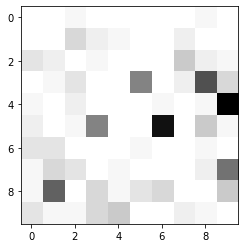

In [203]:
plt.imshow(conf_matr, cmap="Greys")

plt.savefig("Images/error_map_gau_rot.png")

plt.show()

[ 2  9 14 31 21 33  8 21 29 17]


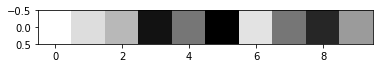

In [204]:
print(wrong_answers_each_class)
plt.imshow(wrong_answers_each_class[None,:], cmap="Greys")
plt.show()

In [205]:
test_target_3 = np.argwhere(test_target == 3)
error_3_8 = test_target_3[np.argwhere(result[test_target_3] == 8)][:, 0]
error_3_8.__len__() # прекрасно, всё верно

12

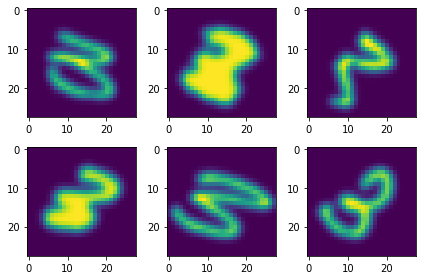

In [206]:
test_target_3 = np.argwhere(test_target == 3)
error_3_8 = test_target_3[np.argwhere(result[test_target_3] == 8)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True)



axs[0, 0].imshow(data_rot[error_3_8[0]].reshape(28, 28))
axs[0, 1].imshow(data_rot[error_3_8[3]].reshape(28, 28))
axs[0, 2].imshow(data_rot[error_3_8[5]].reshape(28, 28))
axs[1, 0].imshow(data_rot[error_3_8[8]].reshape(28, 28))
axs[1, 1].imshow(data_rot[error_3_8[10]].reshape(28, 28))
axs[1, 2].imshow(data_rot[error_3_8[9]].reshape(28, 28))

plt.savefig("Images/error_3_8_gau_rot.png")

plt.show()

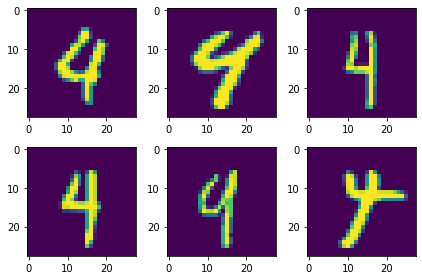

In [129]:
test_target_4 = np.argwhere(test_target == 4)
error_4_9= test_target_4[np.argwhere(result[test_target_4] == 9)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True)

axs[0, 0].imshow(test_data[error_4_9[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error_4_9[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error_4_9[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error_4_9[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error_4_9[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error_4_9[12]].reshape(28, 28))

plt.savefig("Images/error_4_9.png")

plt.show()

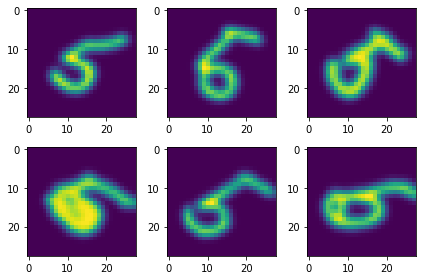

In [207]:
test_target_5= np.argwhere(test_target == 5)
error = test_target_5[np.argwhere(result[test_target_5] == 6)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True)

axs[0, 0].imshow(data_rot[error[0]].reshape(28, 28))
axs[0, 1].imshow(data_rot[error[3]].reshape(28, 28))
axs[0, 2].imshow(data_rot[error[5]].reshape(28, 28))
axs[1, 0].imshow(data_rot[error[8]].reshape(28, 28))
axs[1, 1].imshow(data_rot[error[10]].reshape(28, 28))
axs[1, 2].imshow(data_rot[error[12]].reshape(28, 28))

plt.savefig("Images/error_5_6_gau_rot.png")

plt.show()

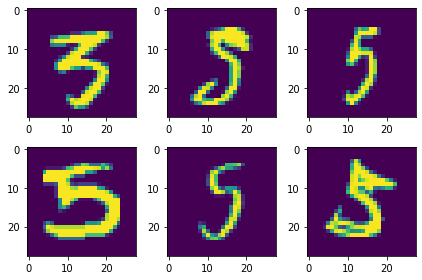

In [131]:
test_target_5 = np.argwhere(test_target == 5)
error = test_target_5[np.argwhere(result[test_target_5] == 3)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True)

axs[0, 0].imshow(test_data[error[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error[2]].reshape(28, 28))
axs[1, 2].imshow(test_data[error[4]].reshape(28, 28))

plt.savefig("Images/error_5_3.png")

plt.show()

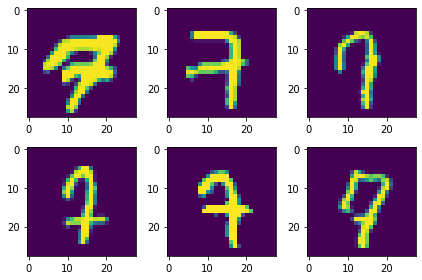

In [132]:
test_target_7 = np.argwhere(test_target == 7)
error = test_target_7[np.argwhere(result[test_target_7] == 9)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True)

axs[0, 0].imshow(test_data[error[0]].reshape(28, 28))
axs[0, 1].imshow(test_data[error[3]].reshape(28, 28))
axs[0, 2].imshow(test_data[error[5]].reshape(28, 28))
axs[1, 0].imshow(test_data[error[8]].reshape(28, 28))
axs[1, 1].imshow(test_data[error[10]].reshape(28, 28))
axs[1, 2].imshow(test_data[error[12]].reshape(28, 28))

plt.savefig("Images/error_7_9.png")

plt.show()

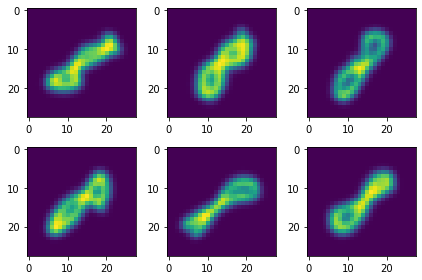

In [208]:
test_target_8 = np.argwhere(test_target == 8)
error = test_target_8[np.argwhere(result[test_target_8] == 1)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True)

axs[0, 0].imshow(data_rot[error[0]].reshape(28, 28))
axs[0, 1].imshow(data_rot[error[3]].reshape(28, 28))
axs[0, 2].imshow(data_rot[error[5]].reshape(28, 28))
axs[1, 0].imshow(data_rot[error[8]].reshape(28, 28))
axs[1, 1].imshow(data_rot[error[2]].reshape(28, 28))
axs[1, 2].imshow(data_rot[error[4]].reshape(28, 28))

plt.savefig("Images/error_8_1_gau_rot.png")

plt.show()

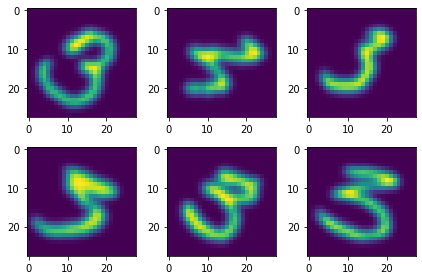

In [209]:

error = test_target_3[np.argwhere(result[test_target_3] == 5)][:, 0]

fig, axs = plt.subplots(2, 3, tight_layout=True)

axs[0, 0].imshow(data_rot[error[0]].reshape(28, 28))
axs[0, 1].imshow(data_rot[error[1]].reshape(28, 28))
axs[0, 2].imshow(data_rot[error[2]].reshape(28, 28))
axs[1, 0].imshow(data_rot[error[3]].reshape(28, 28))
axs[1, 1].imshow(data_rot[error[4]].reshape(28, 28))
axs[1, 2].imshow(data_rot[error[5]].reshape(28, 28))

plt.savefig("Images/error_3_5_gau_rot.png")

plt.show()